Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

Objective

To predict which customer is more likely to purchase the newly introduced travel package.

Objective

To predict which customer is more likely to purchase the newly introduced travel package.

Data Dictionary

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer


In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# importing all of the libraries that I might need

In [172]:
# import different models from sklearn
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [173]:
import warnings
warnings.filterwarnings("ignore")

In [174]:
# Reading the CSV and also creating a copy to work with
data = pd.read_csv('readme_Tourism.csv')
df = data.copy()

In [51]:
# look at the top 10 header
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [52]:
df.tail(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [53]:
# looking at 10 random rows of data 
np.random.seed(1)
df.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [54]:
df.info()
# There are some Objects that need to be converted to Category or integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [55]:
df.nunique()
# checking the number of unique values in each column

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [56]:
# Convert each Object Column into a Category Column
for ea in df.columns:
    if df[ea].dtype=='object':
        df[ea]=pd.Categorical(df[ea])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [58]:
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


Observations:
* Gender has 3 unique values??? need to investigate
* Marital Status has 4??? 

<AxesSubplot:xlabel='Gender', ylabel='count'>

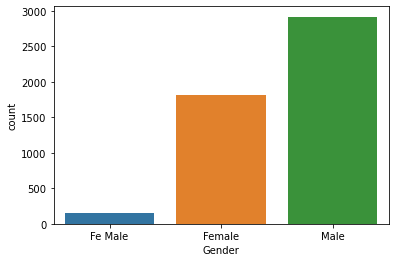

In [59]:
sns.countplot(df['Gender'])

Observation:
* Data Entry error 'Fe Male' - ACTION: convert to 'Female'

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

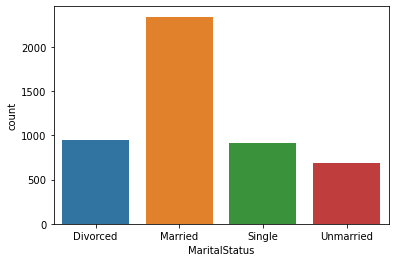

In [60]:
sns.countplot(df['MaritalStatus'])

Observation:
* Fixing Gender and Marital Status Issues: Is Unmarried and Single the same or does Unmarried = 'couple not married'

In [61]:
# writing a function to convert any typos in the gender column to 'Female'
def fix_gender(value):
    if value == 'FeMale' or value == 'Fe Male': #can't tell if there is a space in the error, so check both
        return('Female') # return the correct spelling
    else:
        return value # else, return the origional value

In [62]:
# apply the fix_gender() function to fix gender
df['Gender'] = df['Gender'].apply(fix_gender)
df['Gender'] = pd.Categorical(df['Gender'])

In [63]:
# Commenting out for now - see edit below in Observation
# defining a function to convert "Unmarried" to "Single" category - simplify the MaritalStatus Column
# def fix_marital(status):
#     if status == 'Unmarried':
#         return('Single')
#     else:
#         return(status)

In [64]:
# Commenting out for now - see edit below in Observation
# apply the fix_marital() function to the df
# df['MaritalStatus'] = df['MaritalStatus'].apply(fix_marital)

Observation:
* Issue for Gender is that some values are labeled either 'FeMale' or 'Fe Male' - ACTION: Convert to 'Female'
* Marital Status has 'Single' and 'Unmarried' which could be combined to one Category - Action: Combine 'Single' and 'Unmarried'
 * Assumption: 'Single' and 'Unmarried' mean the same thing; just a data entry inconsistency 
 * EDIT: On second thought, leaving Single and Unmarried as separate Categories - Unmarried couples might be significant

In [65]:
df.describe(include='all')

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4863,4888.000000,4637.000000,4888,4888,4888.000000,4843.000000,4888,4862.000000,4888,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4888,4655.000000
unique,NaN,NaN,NaN,2,NaN,NaN,4,2,NaN,NaN,5,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Basic,NaN,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN
freq,NaN,NaN,NaN,3444,NaN,NaN,2368,2916,NaN,NaN,1842,NaN,2340,NaN,NaN,NaN,NaN,NaN,1842,NaN
mean,202443.500000,0.188216,37.622265,NaN,1.654255,15.490835,NaN,NaN,2.905074,3.708445,NaN,3.581037,NaN,3.236521,0.290917,3.078151,0.620295,1.187267,NaN,23619.853491
std,1411.188388,0.390925,9.316387,NaN,0.916583,8.519643,NaN,NaN,0.724891,1.002509,NaN,0.798009,NaN,1.849019,0.454232,1.365792,0.485363,0.857861,NaN,5380.698361
min,200000.000000,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1000.000000
25%,201221.750000,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,0.000000,1.000000,NaN,20346.000000
50%,202443.500000,0.000000,36.000000,NaN,1.000000,13.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,1.000000,1.000000,NaN,22347.000000
75%,203665.250000,0.000000,44.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,4.000000,1.000000,2.000000,NaN,25571.000000


In [66]:
df.shape
# rows x columns size

(4888, 20)

In [67]:
# Any rows duplicated? No
sum(df.duplicated())

0

In [68]:
df.isnull().sum()
# checking for null values - quite a few columns with missing values

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Observation:
* Multiple columns with null values - This needs to be addressed on a column-by-column basis

In [69]:
# checking the number of null values in each line
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

Observation:
* 4,128 rows are fine, with no nulls
* 533 rows are pretty good, with only 1 null
* 202 rows have 2 nulls
* 25 rows have 3 nulls

* Dealing with 'Age' Column:

In [70]:
# For age, imputing the Median in place of the Null Values
print(df['Age'].isnull().sum()) # print the number of nulls before imputing
df['Age'].fillna(df['Age'].median(), inplace=True) # imput with median inplace 
df['Age'].isnull().sum() # print the number of nulls after imputing

226


0

* Dealing with 'TypeofContact':

In [71]:
# replace the null values in TypeofContact with Self Enquiry and assign it as a category
# I used Self Enquiry because it is the Mode of that Column 
df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry').astype('category')

In [72]:
# double check the above worked
df['TypeofContact'].isnull().sum()

0

Dealing with 'DurationofPitch': 
* Concern is that we don't know if:
 * 1. There was no pitch given, so the number should be zero (makes sense, since there are no zero values: min=5)
 * 2. Using mean/mode would give high average if the above is true
* It's hard to imagine 100% of customers all accepted Pitches to go more than 1 minute or so

Options to deal with this are: 
1. Convert all NaN's to Zero
2. Convert all NaN's to Median (Median 13 is close to mean 15.5) *** WILL TRY THIS FIRST ***
3. 'Bucket' the Column into time ranges (e.g. 0-10min, 10-15 min, 15-20min, 20+), and throw the NaN's into 0-10 min bucket

In [73]:
# Replacing Nulls with Median values
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())

*** Fixing the NumberOfFollowups ***

* Assumption: NaN's are likely from not following up - so we will replace with Zero

In [74]:
# Replacing Nulls with Zero 0 values
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)

*** Fixing 'PreferredPropertyStar' *** 
Assumption: the min/median are both 3.0; there are no 1 or 2 values.. the mean is 3.58
* Will replace NaN's with 3.0 

In [75]:
# Replacing Nulls with a value of 3
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3)

*** Fixing NumberOfTrips Nulls ***

OPTIONS:
* Replace with 0 (Since these are all customers of a travel agency, safe to assume everyone has taken at least 1 trip)
* Replace with Mode 3.0, since mean/mode are close 3/3.24

In [76]:
# Fill in nulls with a value of 3
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(3)

*** Fixing Nulls in NumberOfChildrenVisiting Column ***

OPTIONS:
* Use 0 
* use median 1

In [77]:
# using zero, from assuming that the null values were from data entry not putting a value when there were zero children
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(0)

In [78]:
df.isnull().sum()
# checking for null values - quite a few columns with missing values

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
dtype: int64

*** Fixing Nulls in MonthlyIncome Column ***
* Will use Median since it isn't much different than mean 
* Assumption: people didn't want to volunteer their Income information

In [79]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

*** Double Check all columns to make sure there are no more Nulls ***

In [80]:
df.isnull().sum()
# checking for null values - Success: no more missing values

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Univariate Analysis

In [81]:
# defining a function to plot boxplot above a histogram - plus formatting the background, size and colors
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    f2, (ax_box2, ax_hist2, ) = plt.subplots(nrows = 2, # number of rows of the subplot grid
                                          sharex = False, #x-axis will NOT be shared among subplots
                                          gridspec_kw = {"height_ratios": (.25, .75)},
                                          figsize = figsize
                                          ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='navy') # boxplot will be created and a triangle will show the mean
    sns.distplot(feature, kde=False, ax=ax_hist2, bins = bins, color="navy") if bins else sns.distplot(feature, kde=False, color = 'navy')
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #Add median to histogram
    ax_box2.set_facecolor("whitesmoke") #adding a background color to boxplot
    ax_hist2.set_facecolor("whitesmoke") #adding a background color to histogram

In [82]:
# building a list for the columns in the df, which are only numeric
numeric_columns = []
for colname in df.columns[df.dtypes != 'category']:
    numeric_columns.append(colname)

In [83]:
numeric_columns

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

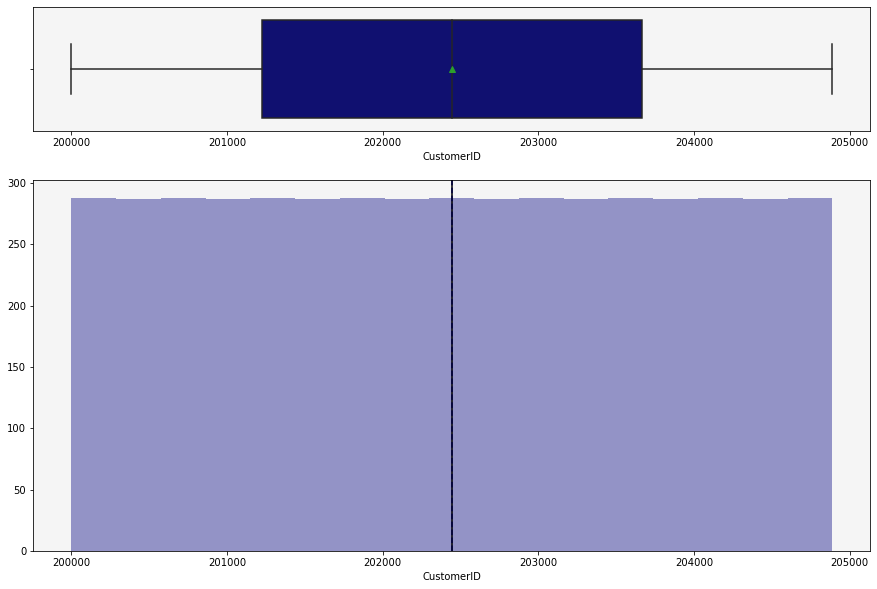

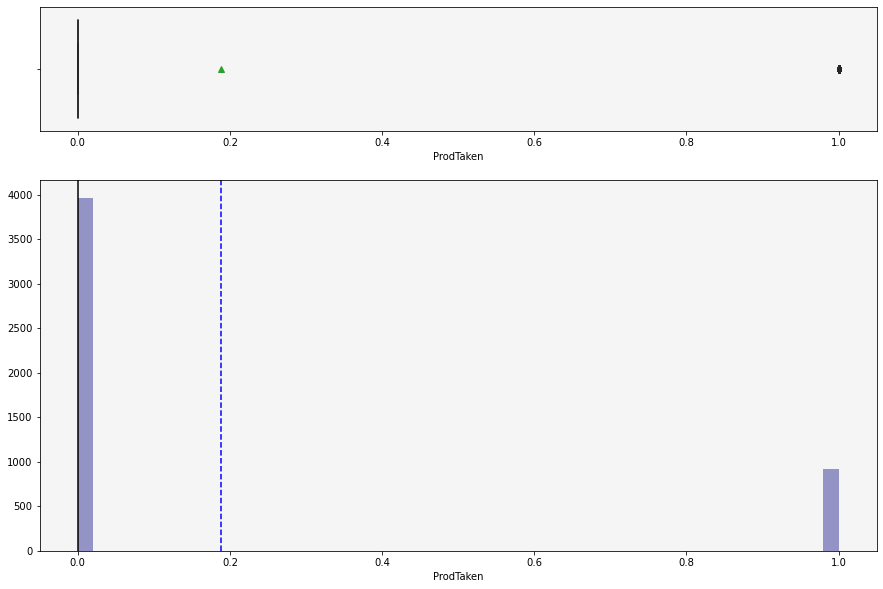

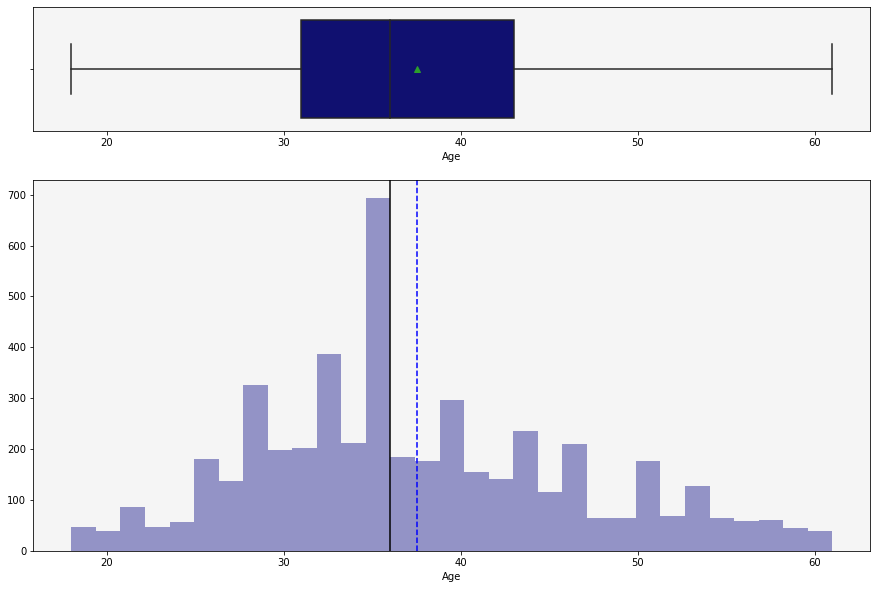

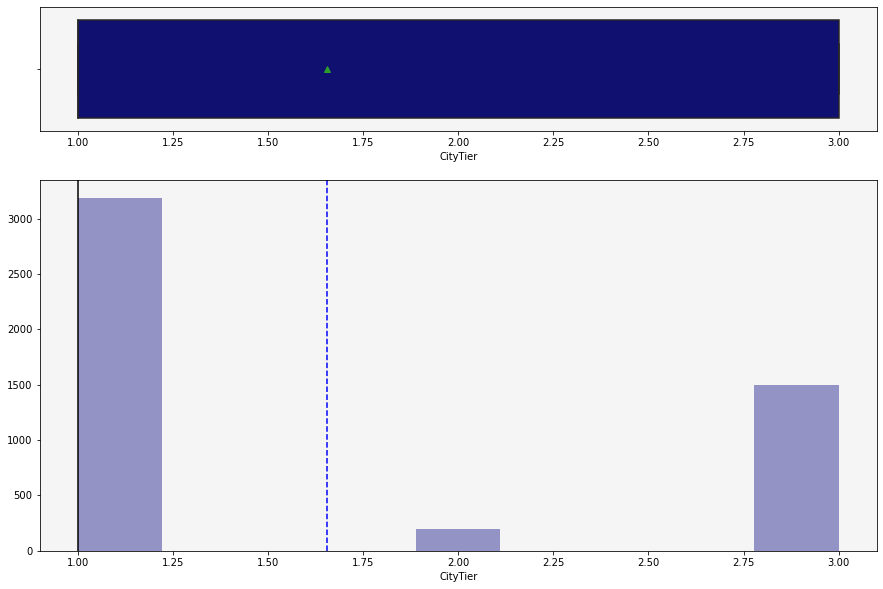

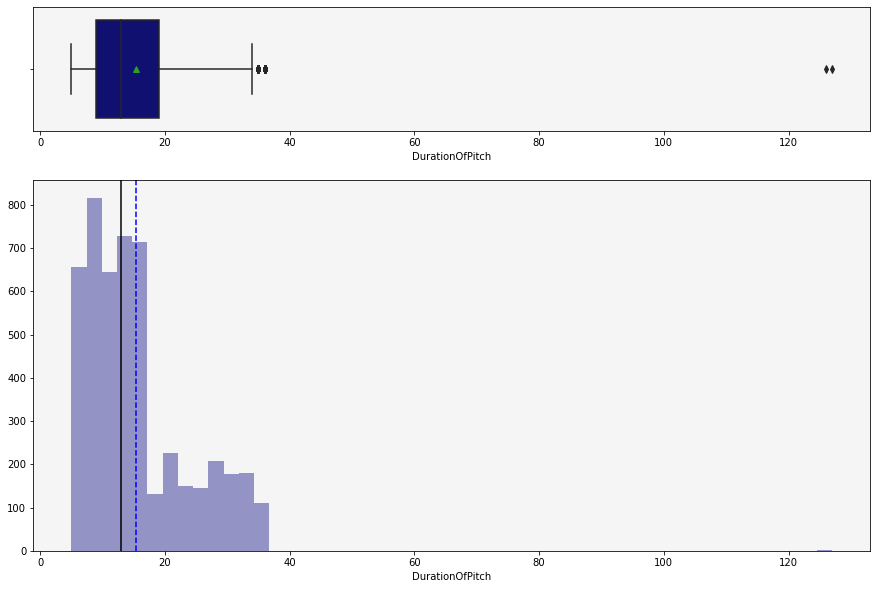

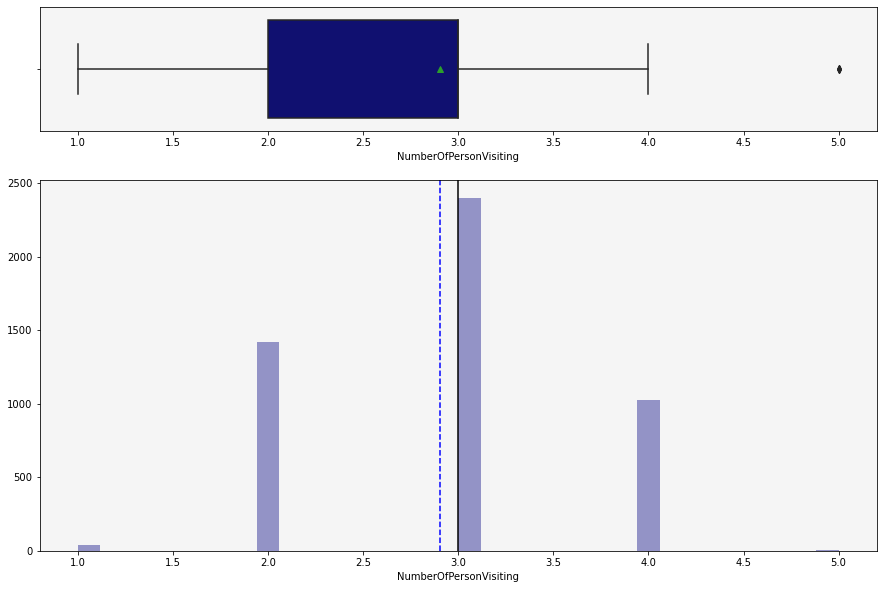

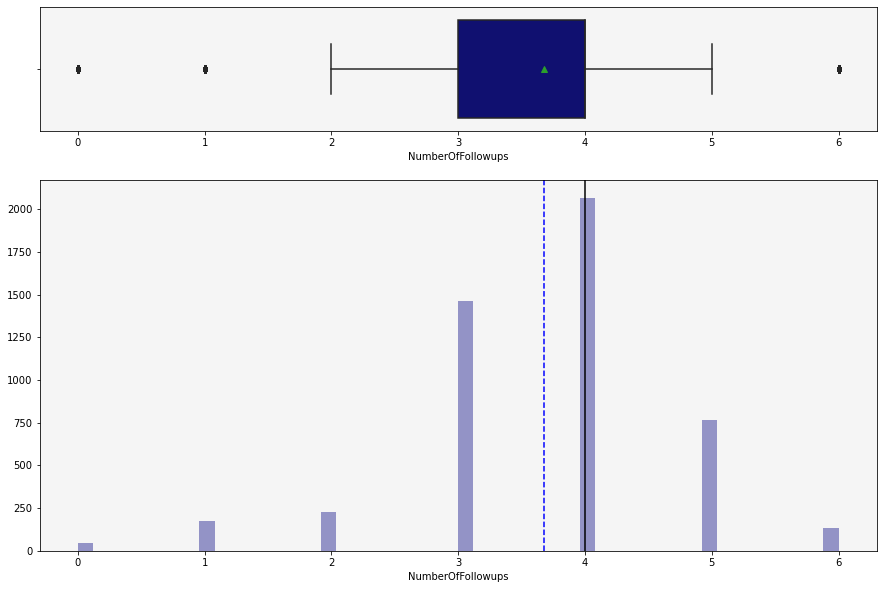

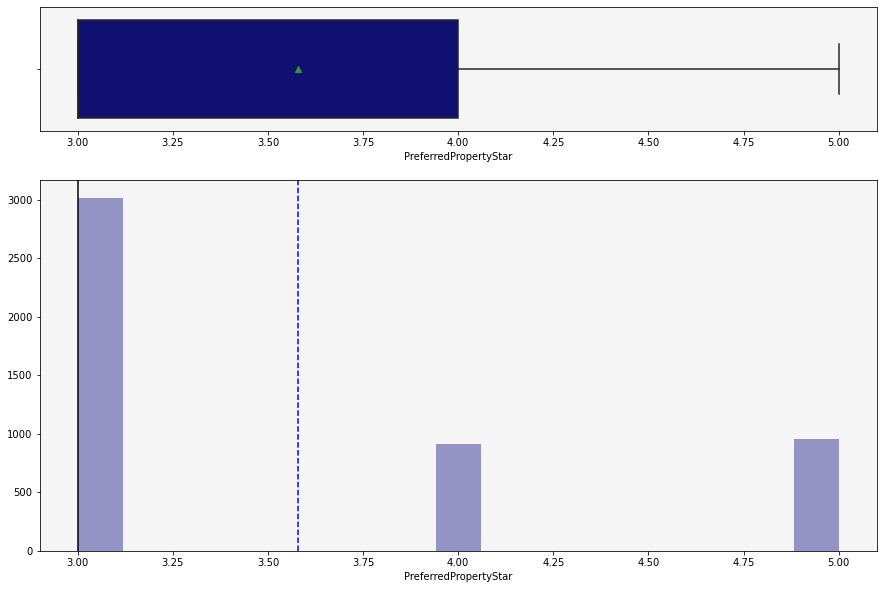

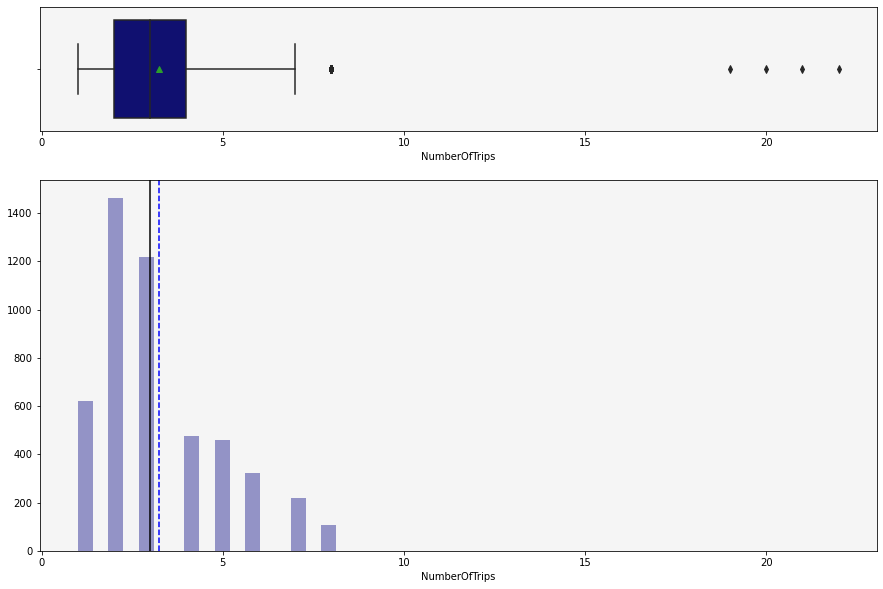

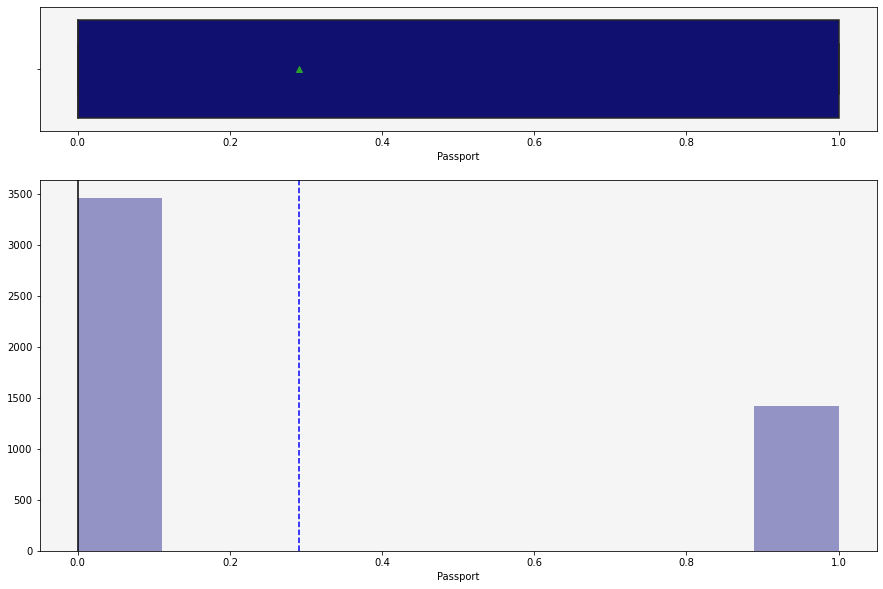

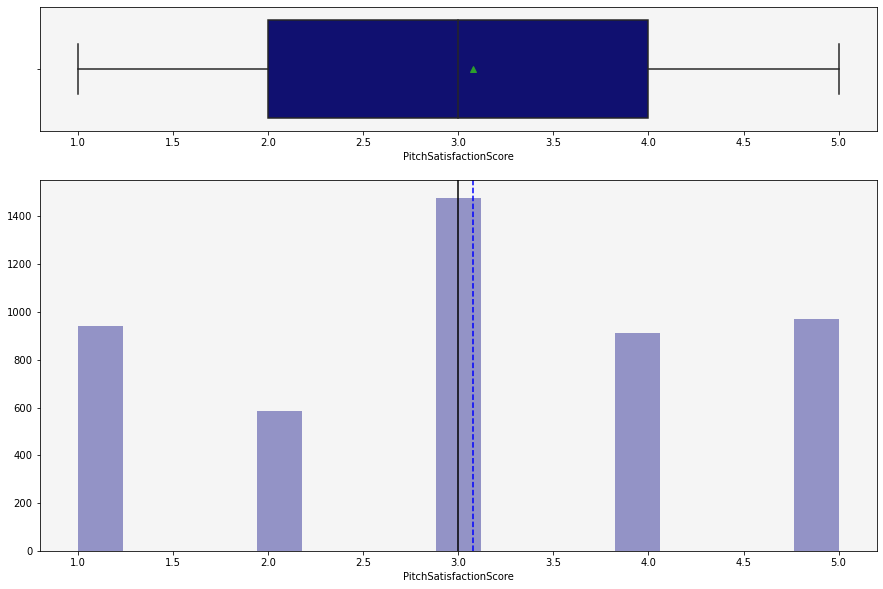

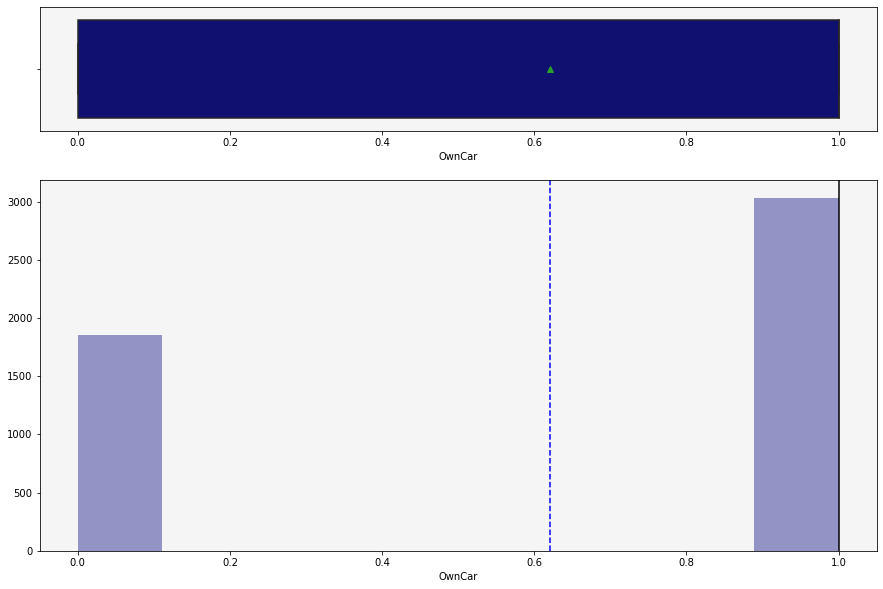

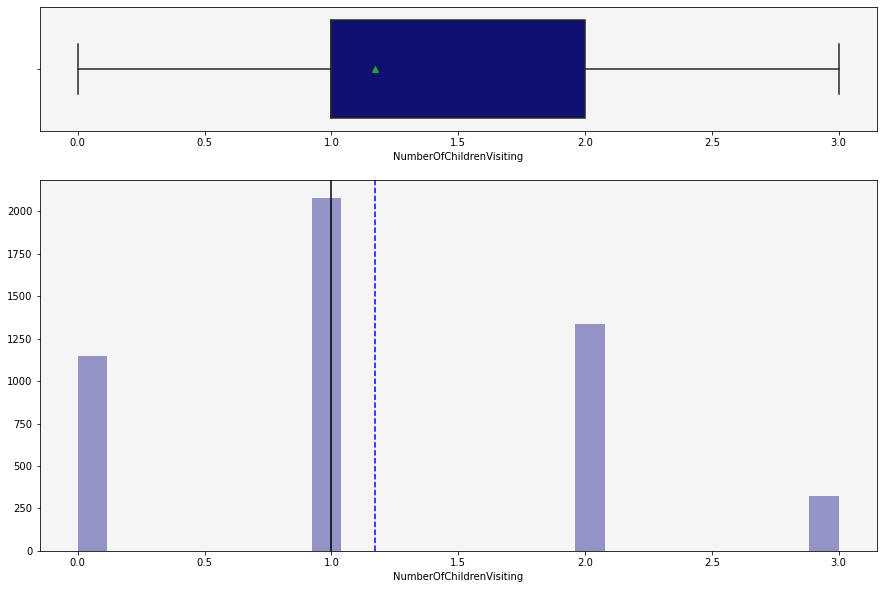

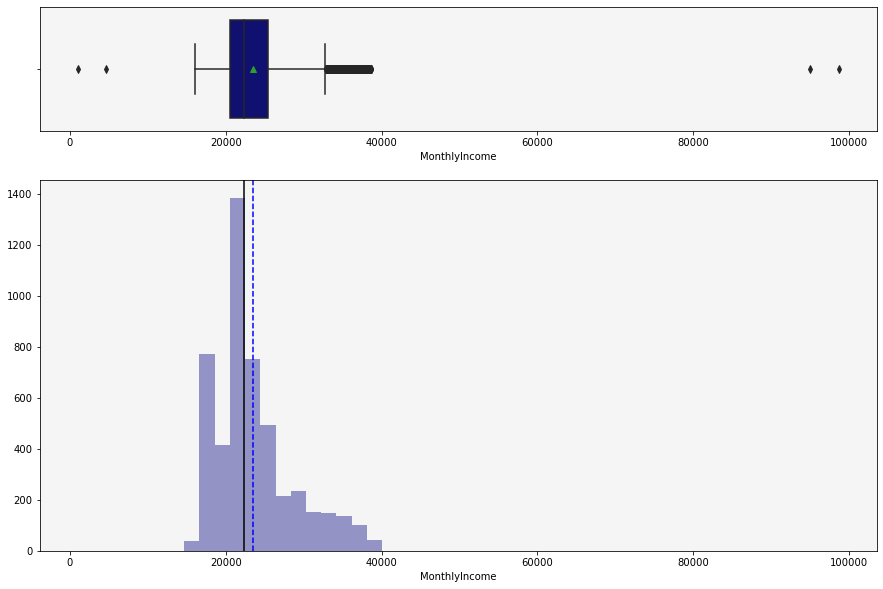

In [84]:
# running a loop through the columns list and plotting the boxplot/distplots 
for each in numeric_columns:
    plt.show()
    histogram_boxplot(df[each]) # for each column, run the histogram_boxplot function 
    

Observations: 
* ProdTaken: small percentage of customers have taken a package
* Age - right skewed 
* City Tier - most customers, over 3000, in tier one.. Over 1000 in tier 3. few in tier 2
* DurationOfPitch - two very large outliers 3 times the 4th quantile. ACTION: Look at EDA, where is the cutoff for Pitch Durations?? In other words, at what point is the salesperson simply wasting time? This will be a good recommendation at the end of the presentation
* NumberOfPersonVisiting - Mostly 2-4 people, with a small number of 1 or 5
* Number of followups- Same EDA needed as DurationOfPitch - when is it a waste of time to followup ?? 
* PreferredPropertyStar - 3 is the minimum 
* Number of Trips - a bit right skewed, but mostly centered around 3
* PitchSatisfactionScore - *** Really Interesting ** lots of 1.0/2.0 scores - ACTION boxplot PitchScore vs ProdTaken - Possible Recommendation would be better training of Salespeople
* NoChildrenVisiting - Weird metric when coupled with No.PersonVisiting - ACTION EDA on family size who takes/doesn't take trips
* MonthlyIncome - Seems odd with high values: Possibly in Indian Rupees? or mislabled YearlyIncome in Dollars?? - Either way, the EDA and model should sort it out 


In [85]:
# Setting up data into quartiles to get rid of the major outliers
quartiles = np.quantile(df['MonthlyIncome'][df['MonthlyIncome'].notnull()],[.25, .75])
income_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4 * IQR = {income_4iqr}')
outlier_powers = df.loc[np.abs(df['MonthlyIncome'] - df['MonthlyIncome'].median()) > income_4iqr, 'MonthlyIncome']
outlier_powers


Q1 = 20485.0, Q3 = 25424.75, 4 * IQR = 19759.0


38      95000.0
142      1000.0
2482    98678.0
Name: MonthlyIncome, dtype: float64

In [86]:
# Remove the major outliers
df.drop(outlier_powers.index, axis=0, inplace=True)

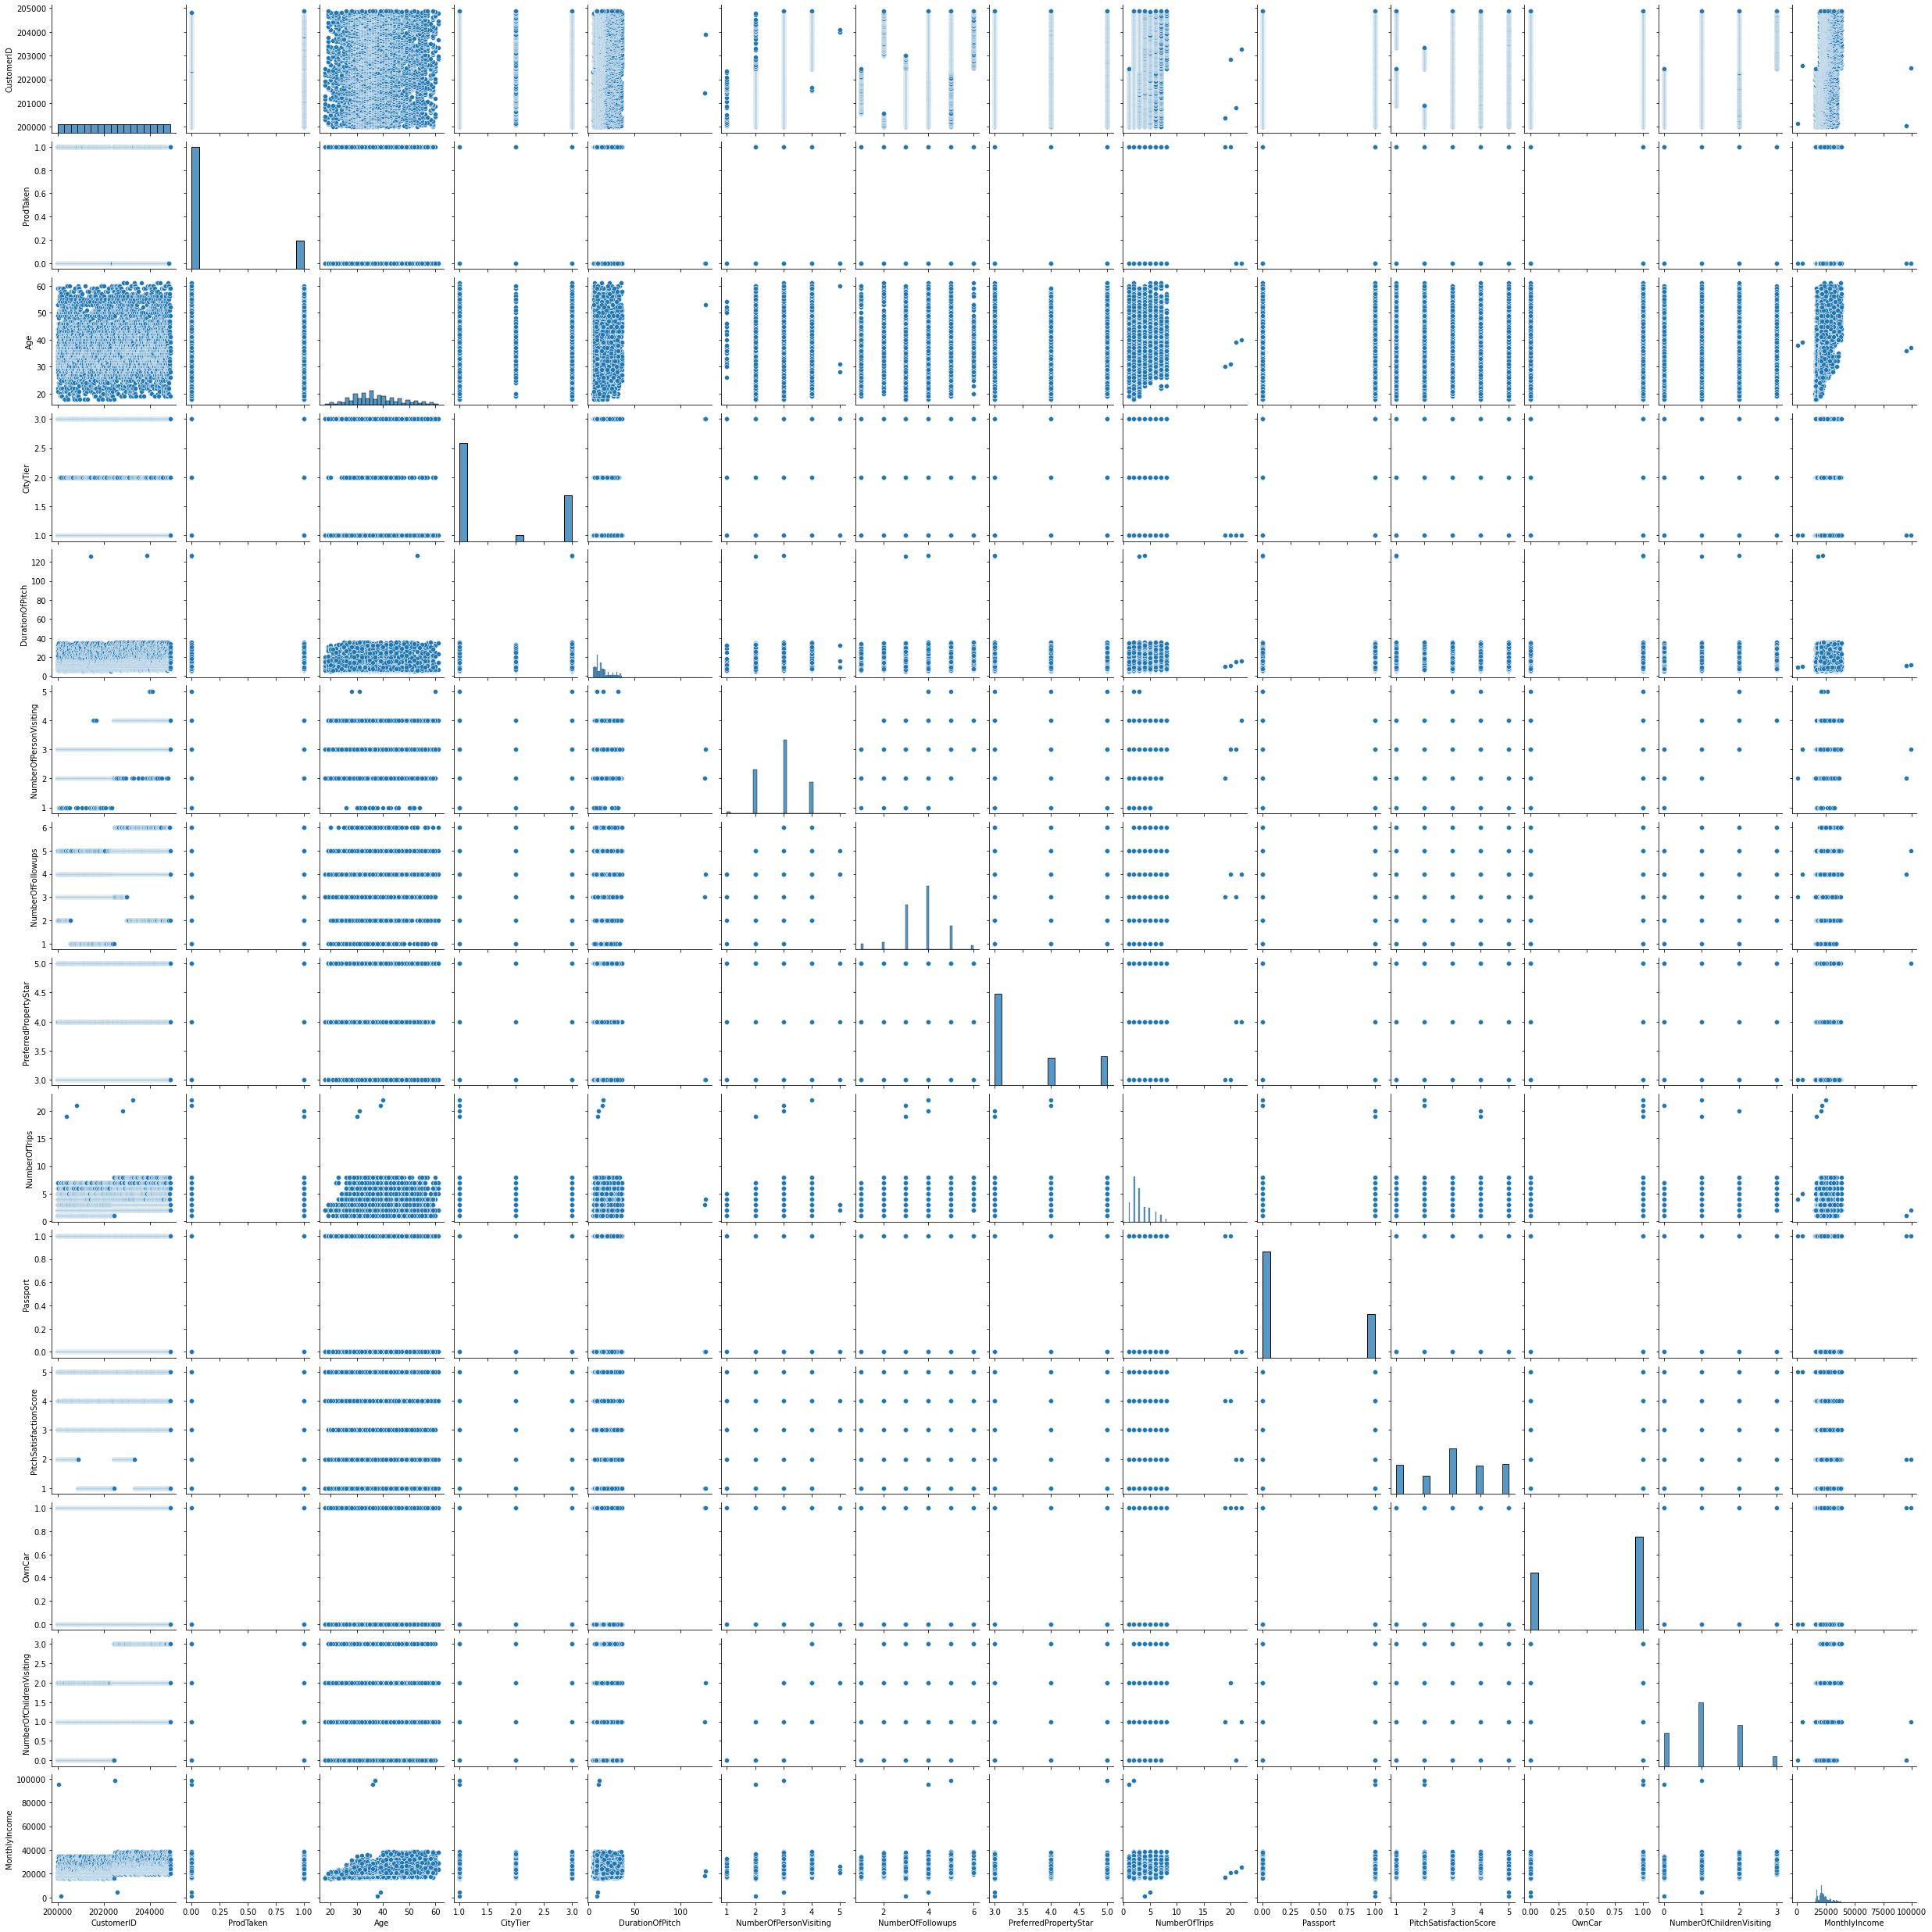

In [175]:
sns.pairplot(df)

Observation:
* Not much insight from standard pairplot

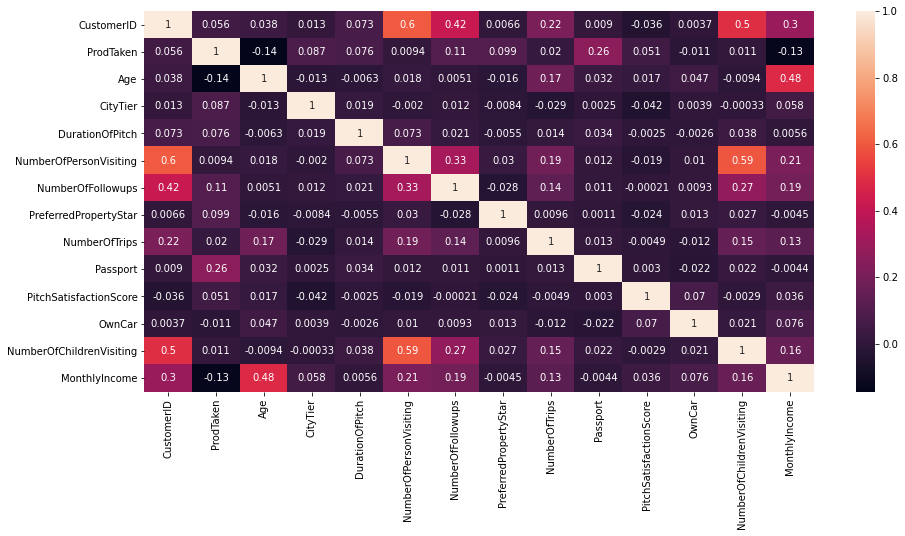

In [88]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

Observation:
* Not very much correlation to work with from the Heatmap

In [89]:
# to allow for boxplot - convert ProdTaken to Categorical
df['ProdTaken'] = pd.Categorical(df['ProdTaken'])

In [90]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Bivariate Analysis

In [91]:
# create a df that is only for the ProdTaken=1
df_ProdTaken = df[df['ProdTaken']==1]

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

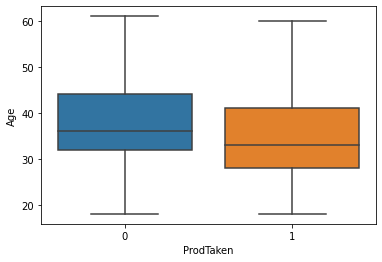

In [92]:
sns.boxplot(y = df['Age'], x = df['ProdTaken'])

Observation: 
* 30-40 year olds tend to take more packages
* However, the proposed Wellness package might be the key to gaining older potential customers
* Also, there is another good graph in the Countplots

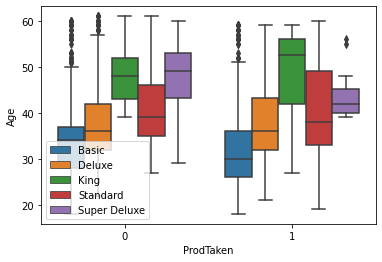

In [93]:

prod_taken_plot = sns.boxplot(y = df['Age'], x = df['ProdTaken'],hue=df['ProductPitched'])
plt.legend(loc='lower left')

Observation: 
* younger crowd 35 and below prefer the Basic

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

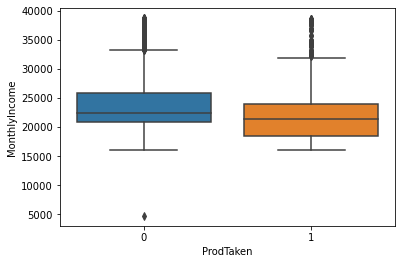

In [94]:
sns.boxplot(y = df['MonthlyIncome'], x = df['ProdTaken'])

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

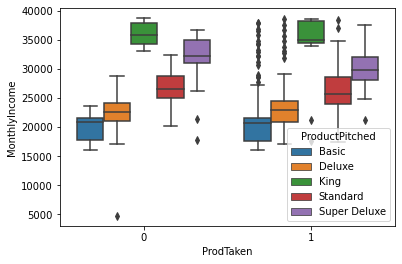

In [95]:
sns.boxplot(y = df['MonthlyIncome'], x = df['ProdTaken'],hue=df['ProductPitched'])

Observations:
* Higher wage earners tend to prefer the King Package

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

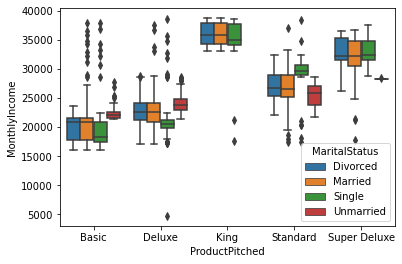

In [96]:
sns.boxplot(y = df['MonthlyIncome'], x = df['ProductPitched'],hue=df['MaritalStatus'])

<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

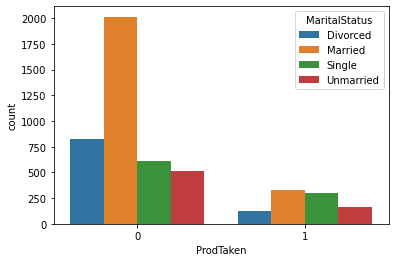

In [97]:
sns.countplot(df['ProdTaken'],hue=df['MaritalStatus'])

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

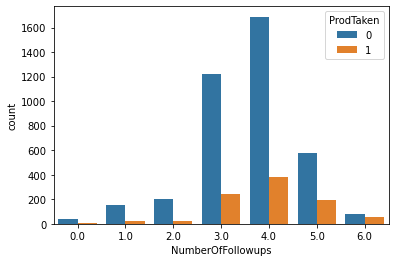

In [98]:
sns.countplot(df['NumberOfFollowups'], hue=df['ProdTaken'])

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

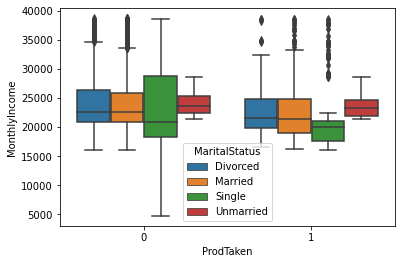

In [99]:
sns.boxplot(y = df['MonthlyIncome'], x = df['ProdTaken'],hue=df['MaritalStatus'])

Observation:
* People taking the package, have a bit lower salary

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

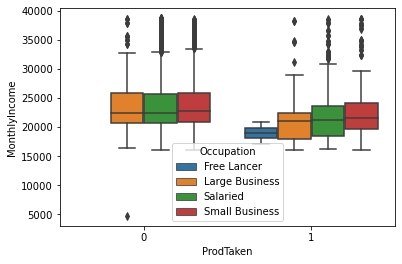

In [100]:
sns.boxplot(y = df['MonthlyIncome'], x = df['ProdTaken'],hue=df['Occupation'])

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

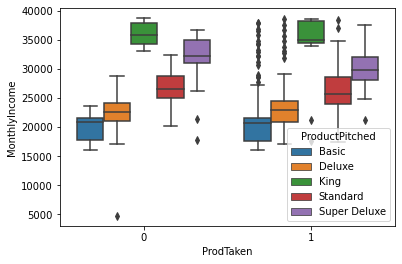

In [101]:
sns.boxplot(y = df['MonthlyIncome'], x = df['ProdTaken'], hue=df['ProductPitched'])

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

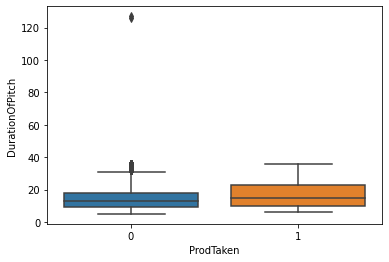

In [102]:
sns.boxplot(y = df['DurationOfPitch'], x = df['ProdTaken'])

Observation:
* No need to go past 30 minutes 
* 5 min minimum is key

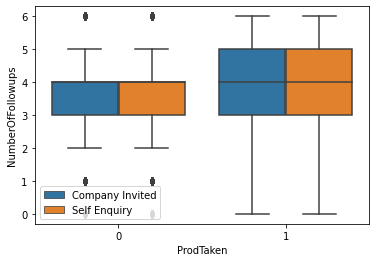

In [103]:
sns.boxplot(y = df['NumberOfFollowups'], x = df['ProdTaken'],hue = df['TypeofContact'])
plt.legend(loc='lower left')

Observation:
* wow I thought that the ProdTaken 1 category would be much lower 

<AxesSubplot:xlabel='ProdTaken', ylabel='PitchSatisfactionScore'>

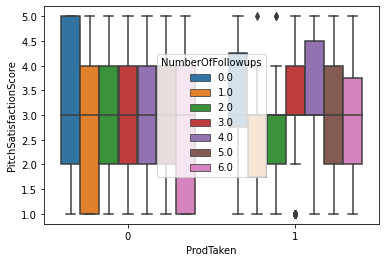

In [104]:
sns.boxplot(y = df['PitchSatisfactionScore'], x = df['ProdTaken'],hue = df['NumberOfFollowups'])

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

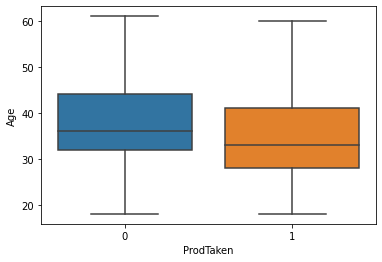

In [105]:
sns.boxplot(y = df['Age'], x = df['ProdTaken'])

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

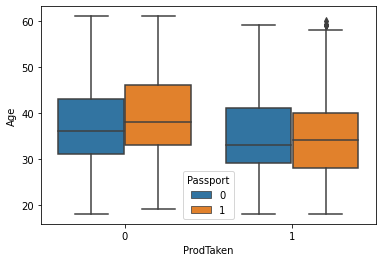

In [106]:
sns.boxplot(y = df['Age'], x = df['ProdTaken'], hue=df['Passport'])

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

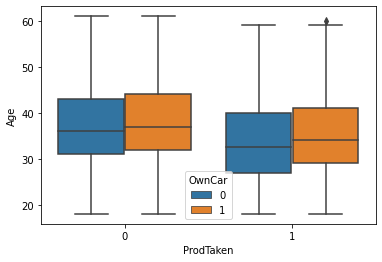

In [107]:
sns.boxplot(y = df['Age'], x = df['ProdTaken'], hue=df['OwnCar'])

Places to Bin: (NOTE: Before binning, inserted some boxplots above due to errors with these needing to be numerical)
* Age
* MonthlyIncome
* DurationOfPitch


Binning the Age into buckets: 20s, 30s,40s, etc.

<AxesSubplot:xlabel='Age'>

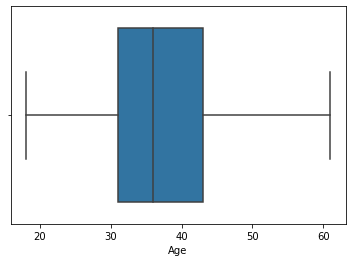

In [108]:
sns.boxplot(df['Age'])

In [109]:
# bin the age to run a countplot and hopefully get better insight into the demographics
df['binned_age'] = pd.cut(df['Age'], [0,20,30,40,50,70],labels = ['Under 20','20s','30s','40s','50+'])
df.drop(['Age'],axis=1,inplace=True)

In [168]:
# run it again but with the df for actual customers
df_ProdTaken['binned_age'] = pd.cut(df_ProdTaken['Age'], [0,20,30,40,50,70],labels = ['Under 20','20s','30s','40s','50+'])
df_ProdTaken.drop(['Age'],axis=1,inplace=True)

<AxesSubplot:xlabel='binned_age', ylabel='count'>

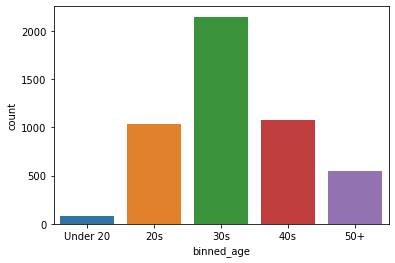

In [110]:
sns.countplot(df['binned_age'])

<AxesSubplot:xlabel='binned_age', ylabel='count'>

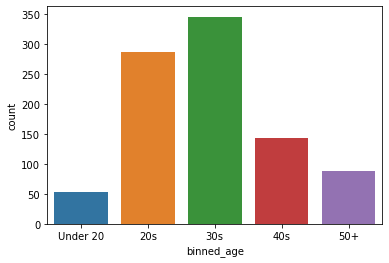

In [169]:
sns.countplot(df_ProdTaken['binned_age'])

Observations
* Customers in their 30's are the main source of customers taking currently offered packages


Binning the MonthlyIncome into buckets

<AxesSubplot:xlabel='MonthlyIncome'>

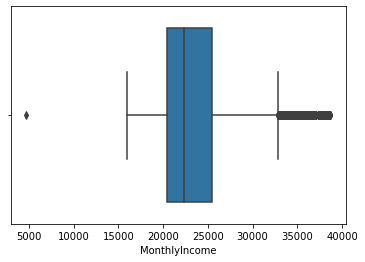

In [111]:
# checking the range of MonthlyIncome, to pick the buckets 
sns.boxplot(df['MonthlyIncome'])

In [112]:
# binning income to get better insight into the data
df['binned_income'] = pd.cut(df['MonthlyIncome'], [0,15000,20000,25000,30000,35000,40000,150000],labels = ['Under 15k','15-20k','20-25k','25-30k','30-35k','35-40k','40k+'])
df.drop(['MonthlyIncome'],axis=1,inplace=True)

In [163]:
# run it again but with the df for actual customers
df_ProdTaken['binned_income'] = pd.cut(df_ProdTaken['MonthlyIncome'], [0,15000,20000,25000,30000,35000,40000,150000],labels = ['Under 15k','15-20k','20-25k','25-30k','30-35k','35-40k','40k+'])
df_ProdTaken.drop(['MonthlyIncome'],axis=1,inplace=True)

<AxesSubplot:xlabel='binned_income', ylabel='count'>

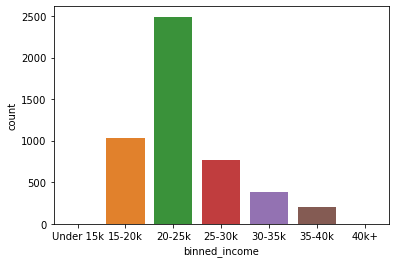

In [113]:
sns.countplot(df['binned_income'])

<AxesSubplot:xlabel='binned_income', ylabel='count'>

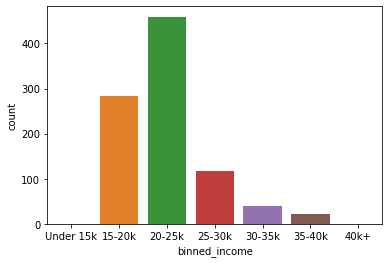

In [164]:
sns.countplot(df_ProdTaken['binned_income'])

Observations:
* Customers in the 20-25k Income Range are the main source of customers taking currently offered packages


Binning the Duration of Pitch 

<AxesSubplot:xlabel='DurationOfPitch'>

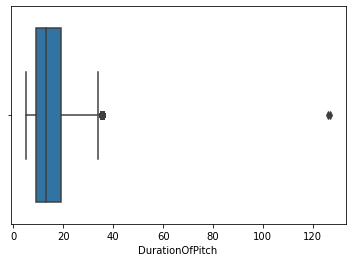

In [114]:
# checking the range of DurationOfPitch, to pick the buckets 
sns.boxplot(df['DurationOfPitch'])

In [115]:
df['binned_pitch_time'] = pd.cut(df['DurationOfPitch'], [-1,5,10,15,20,25,30,35,150],labels = ['Under 5','5-10','10-15','15-20','20-25','25-30','30-35','40+'])
df.drop(['DurationOfPitch'],axis=1,inplace=True)

In [165]:
df_ProdTaken['binned_pitch_time'] = pd.cut(df_ProdTaken['DurationOfPitch'], [-1,5,10,15,20,25,30,35,150],labels = ['Under 5','5-10','10-15','15-20','20-25','25-30','30-35','40+'])
df_ProdTaken.drop(['DurationOfPitch'],axis=1,inplace=True)

<AxesSubplot:xlabel='ProdTaken', ylabel='PitchSatisfactionScore'>

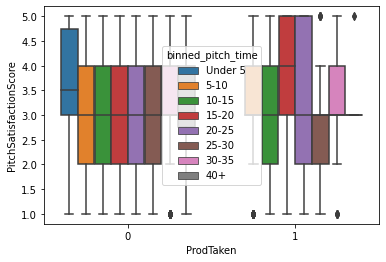

In [116]:
sns.boxplot(y = df['PitchSatisfactionScore'], x = df['ProdTaken'],hue = df['binned_pitch_time'])

<AxesSubplot:xlabel='binned_pitch_time', ylabel='count'>

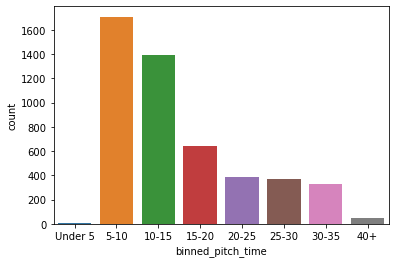

In [117]:
# binned pitch time for all prospects
sns.countplot(df['binned_pitch_time'])

<AxesSubplot:xlabel='binned_pitch_time', ylabel='count'>

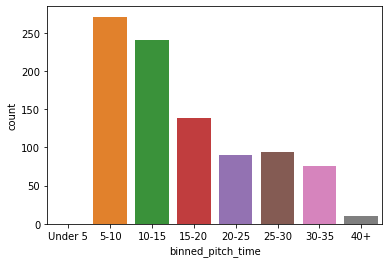

In [166]:
# binned pitch time for actual customers
sns.countplot(df_ProdTaken['binned_pitch_time'])

Observations:
* 5-10 min pitch time is optimal, and 10-15 is also significant
* From countplot, it appears to be an Exponential Decay Curve
* ACTION: RECCOMENDATION: Set a MAX Recommended Pitch Time. Avoid pitch times of 20 min or more (OR maybe 30-35+) - It appears to be a waste of time and resources: It is better to get on another call with a fresh candidate. 
* ACTION: Set a MIN Recommended Pitch Time also. 5 minute MIN


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4885 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4885 non-null   int64   
 1   ProdTaken                 4885 non-null   category
 2   TypeofContact             4885 non-null   category
 3   CityTier                  4885 non-null   int64   
 4   Occupation                4885 non-null   category
 5   Gender                    4885 non-null   category
 6   NumberOfPersonVisiting    4885 non-null   int64   
 7   NumberOfFollowups         4885 non-null   float64 
 8   ProductPitched            4885 non-null   category
 9   PreferredPropertyStar     4885 non-null   float64 
 10  MaritalStatus             4885 non-null   category
 11  NumberOfTrips             4885 non-null   float64 
 12  Passport                  4885 non-null   int64   
 13  PitchSatisfactionScore    4885 non-null   int64 

In [119]:
df.columns

Index(['CustomerID', 'ProdTaken', 'TypeofContact', 'CityTier', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'binned_age',
       'binned_income', 'binned_pitch_time'],
      dtype='object')

In [120]:
df.head()

,CustomerID,ProdTaken,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,binned_age,binned_income,binned_pitch_time
0,200000,1,Self Enquiry,3,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,40s,20-25k,5-10
1,200001,0,Company Invited,1,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,40s,20-25k,10-15
2,200002,1,Self Enquiry,1,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,30s,15-20k,5-10
3,200003,0,Company Invited,1,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,30s,15-20k,5-10
4,200004,0,Self Enquiry,1,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,30s,15-20k,5-10


In [121]:
df.describe()
# Initial statistical overview of the dataset

,CustomerID,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting
count,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,202444.455681,1.654657,2.905425,3.674104,3.577892,3.230297,0.290481,3.078199,0.620266,1.171750
std,1410.817276,0.916721,0.724880,1.058987,0.796904,1.822931,0.454031,1.365760,0.485370,0.862935
min,200000.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,201223.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,202444.000000,1.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000
75%,203666.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000
max,204887.000000,3.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000


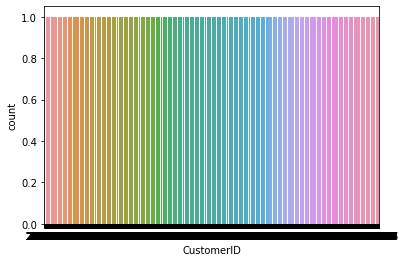

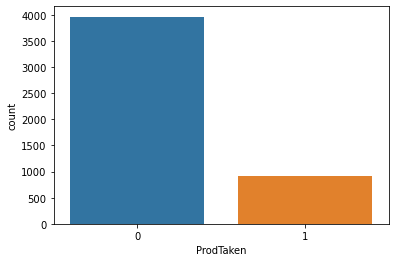

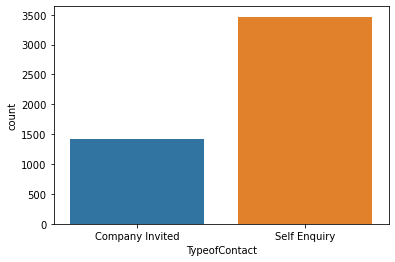

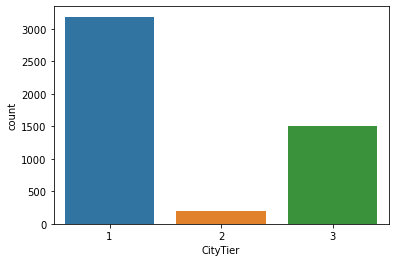

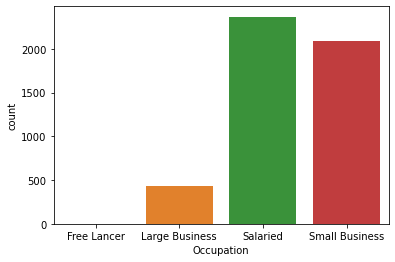

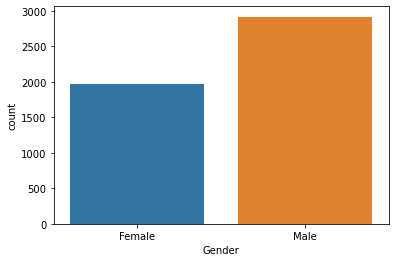

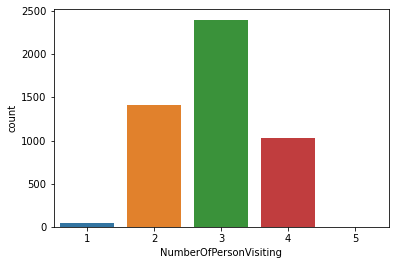

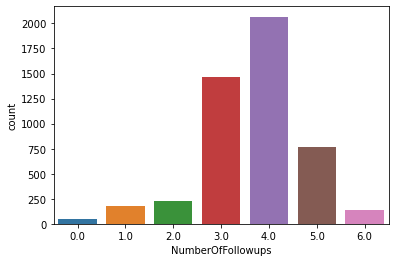

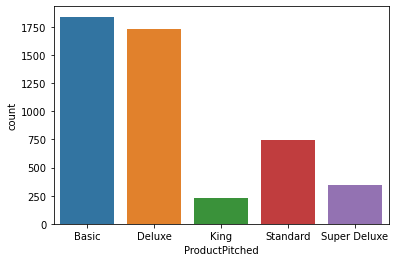

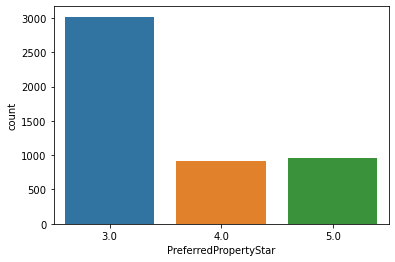

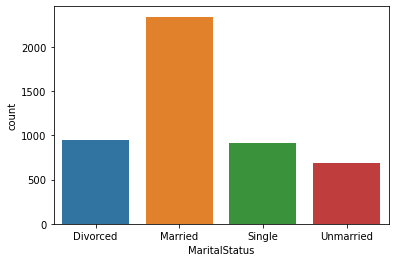

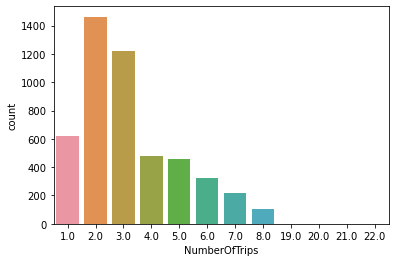

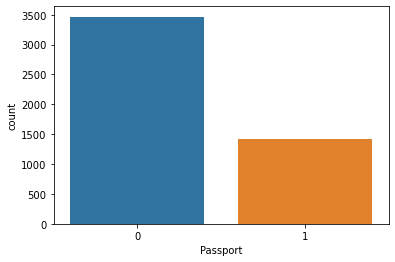

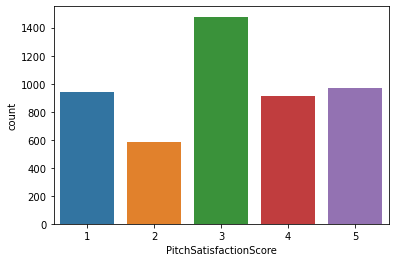

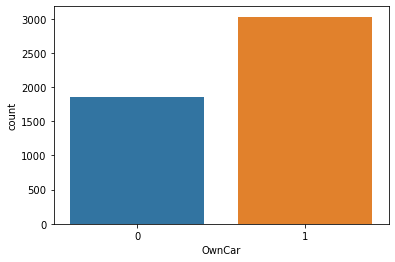

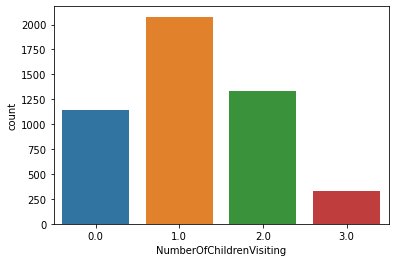

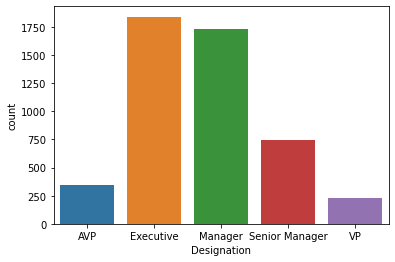

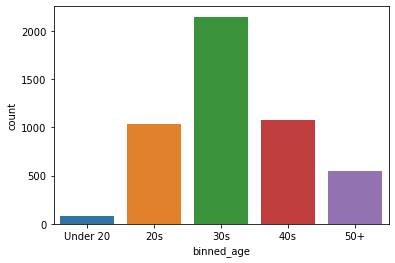

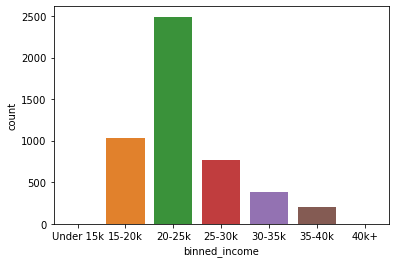

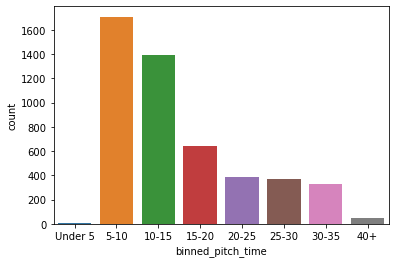

In [122]:
# run a countplot for each column in the df
for ea in df.columns:
    plt.figure()
    sns.countplot(df[ea])

Observations:
* Over 500 customers took a package - Almost 4000 did not. 
* Almost 1500 company invites - almost 3,500 were self-enquiry. ACTION: boxplot TypeOfContact with Hue=prodTaken
* Majority of customers, over 3,000, from Tier 1 cities
* Majority are salaried or involved with Small business. ACTION: boxplot Occupation with Hue=ProdTaken
* Mostly males purchased the packages. Consider focusing sales towards males, who will invite their female partner/spouse.
* NumberOfPersonVisiting - Mostly 2-3. RECOMMENDATION packages with discounts for more people or discounts for extra rooms. 
* 3-5 followups is the norm. ACTION: boxplot No.Followups with ProdTaken. RECOMEND a min/max # of followups - don't waste time
* Basic/Deluxe are top sellers with Standard in 3rd place 
* 3.0 is preferred - probably a good balance between price/value
* Married is top maritalstatus category
* Most folks are going to take 2-3 trips total
* Most people didn't have a passport. ACTION boxplot with Passport / ProdTaken - We might be wasting time with people w/o passports? 
* ACTION: boxplot PitchSatisfaction vs. ProdTaken vs. Pitch_Time. Suspect longer pitches = poor_review / no-purchase.. Short/sweet gets the order
* ACTION: boxplot OwnCar vs ProdTaken
* ACTION: boxplot NumberOfChildrenVisiting vs NumberOfPeople vs ProdTaken/Package Taken.. Suspect larger families want the economy packages and Older/higher income people want the fancier and/or Health packages 
* ACTION: boxplot Designation with income vs ProdTaken vs package_taken
* Biggest age group is 30's. ACTION: boxplot Age vs package_taken - Possible recommendation for Designation/age equates to a Recommendation package
* 15-25 is the largest set of groups. ACTION: boxplot Age vs ProdTaken/Package Taken
* Most Pitches are 5-20 min

In [127]:
# shape of ProdTaken=1 df, shows how many total took Packages
df_ProdTaken.shape

(920, 20)

In [129]:
# 18.9% success rate.. Number of Packages (920) divided by total 
success = df_ProdTaken.shape[0]
total = df.shape[0]
success/total

0.18833162743091095

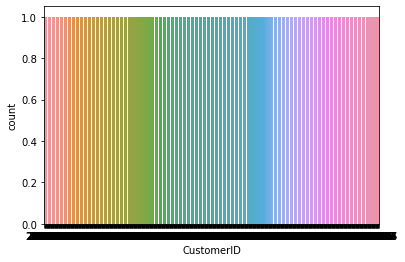

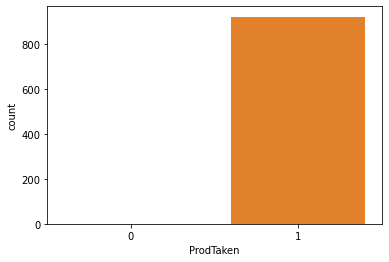

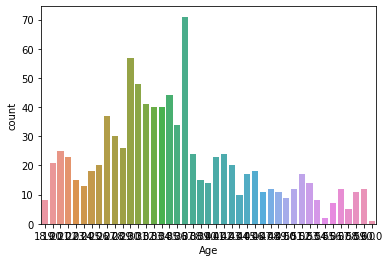

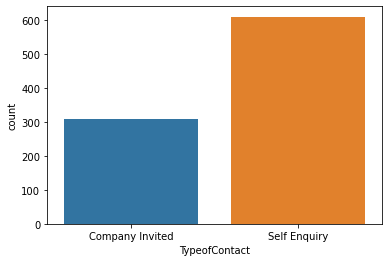

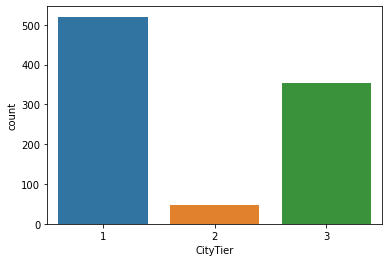

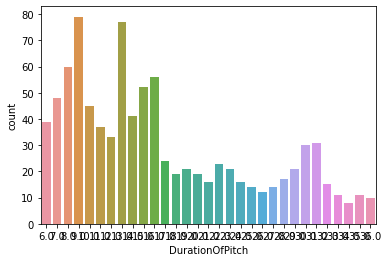

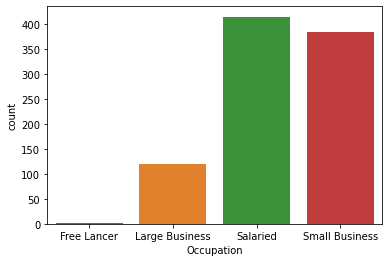

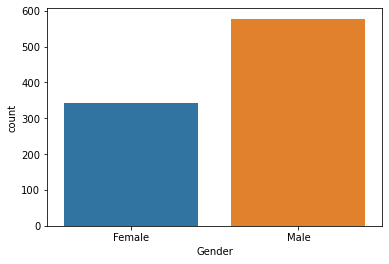

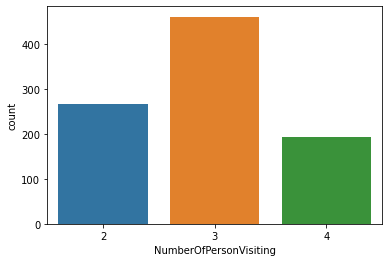

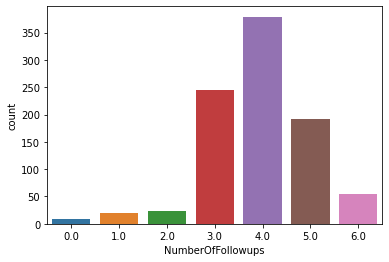

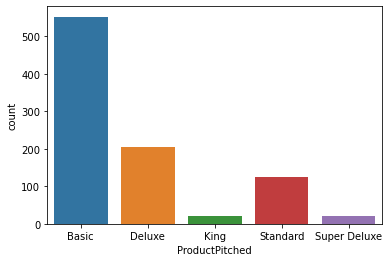

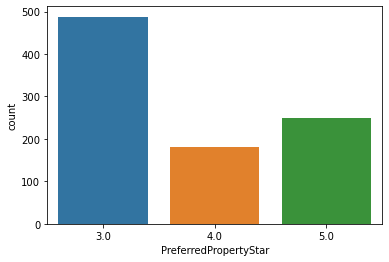

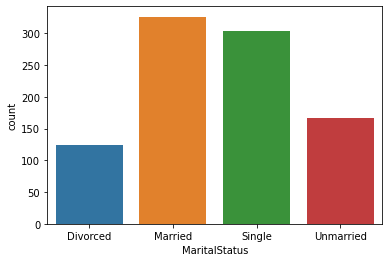

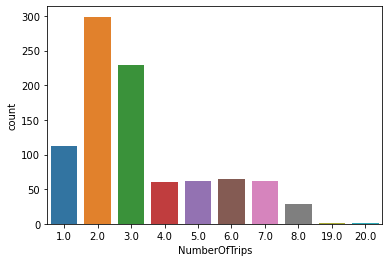

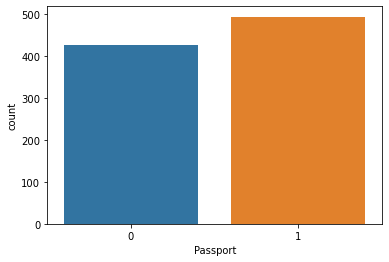

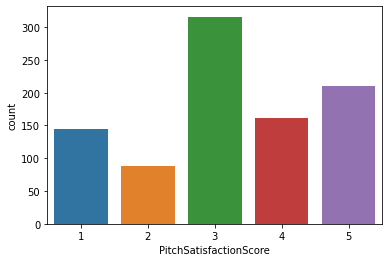

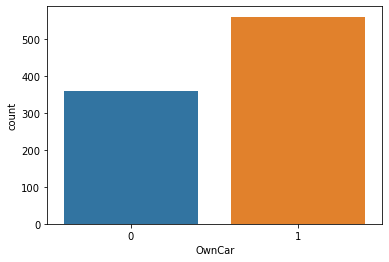

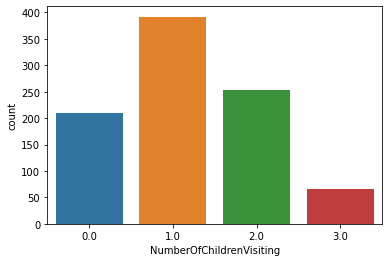

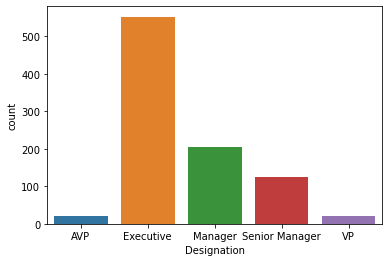

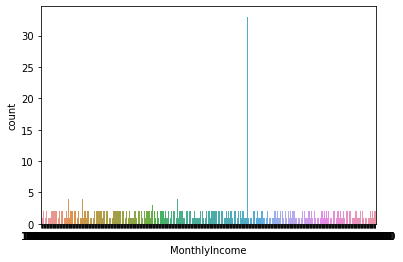

In [126]:
# run a countplot for each column in the Actual Customer df (df_ProdTaken)
for ea in df_ProdTaken.columns:
    plt.figure()
    sns.countplot(df_ProdTaken[ea])

Observations:
* Self Enquiry is the most popular engagement method (Advertisement is important)
* Basic Package is the most popular. King and Super Deluxe are poor performers
* Majority are Executives (over 500 - which over 50% of all packages taken)
* Majority have children than Do Not (Over 650 - 70% of all packages taken) 
* Majority were salaried or owned a small business (~80%) 
* Over half were Male 
* 3-5 Follow Ups is key to making Sales
* Over half own a car
* Multiple Trips - Over 85% of Package buyers are repeat customer (Discounts and Incentives for repeat business would do well) 
* Over half of customers have a Partner while the other half is comprised of single (~30%) and divorcees (~15%) 
* A good pitch is important (~70% of successful pitches had  a rating of 3 or higher)


ONE HOT ENCODING

In [130]:
hot_columns = ['TypeofContact', 'CityTier', 'Occupation',
       'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'binned_age',
       'binned_income', 'binned_pitch_time']

In [131]:
df = pd.get_dummies(df, columns = hot_columns)

In [132]:
df.head(10)

,CustomerID,ProdTaken,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,...,binned_income_35-40k,binned_income_40k+,binned_pitch_time_Under 5,binned_pitch_time_5-10,binned_pitch_time_10-15,binned_pitch_time_15-20,binned_pitch_time_20-25,binned_pitch_time_25-30,binned_pitch_time_30-35,binned_pitch_time_40+
0,200000,1,3,3.0,3.0,1.0,1,2,1,0.0,...,0,0,0,1,0,0,0,0,0,0
1,200001,0,3,4.0,4.0,2.0,0,3,1,2.0,...,0,0,0,0,1,0,0,0,0,0
2,200002,1,3,4.0,3.0,7.0,1,3,0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,200003,0,2,3.0,3.0,2.0,1,5,1,1.0,...,0,0,0,1,0,0,0,0,0,0
4,200004,0,2,3.0,4.0,1.0,0,5,1,0.0,...,0,0,0,1,0,0,0,0,0,0
5,200005,0,3,3.0,3.0,1.0,0,5,1,1.0,...,0,0,0,1,0,0,0,0,0,0
6,200006,0,2,2.0,5.0,5.0,1,2,1,1.0,...,0,0,0,1,0,0,0,0,0,0
7,200007,0,3,3.0,3.0,2.0,0,2,0,1.0,...,0,0,0,0,0,0,0,1,0,0
8,200008,0,2,4.0,3.0,1.0,0,3,0,0.0,...,0,0,0,0,0,0,0,1,0,0
9,200009,0,3,3.0,3.0,7.0,0,3,1,0.0,...,0,0,0,0,0,0,0,0,1,0


In [133]:
# We don't really need the CustomerID - DROP IT
df = df.drop('CustomerID',axis=1)

SPLIT DATA

In [134]:
# create the X and y datasets BUT REMOVE the Personal Loan Series, which is the independent variable
X = df.drop("ProdTaken", axis=1)
y = df.pop("ProdTaken")

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, shuffle=True)

In [136]:
X_train.shape, X_test.shape

((3419, 53), (1466, 53))

BUILD MODELS

In [137]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        
    
    return score_list # returning the list with train and test scores

In [138]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Decision Tree Model

Based on the Project Requirements: We want to Minimize False Positives (i.e. Predicting they will take the package but actually won't - minimize this) to keep Sales/Marketing costs to a minimum. 

Maximize Recall (TP / (TP + FN)) 

Accuracy on training set :  1.0
Accuracy on test set :  0.8744884038199181
Recall on training set :  1.0
Recall on test set :  0.7335907335907336
Precision on training set :  1.0
Precision on test set :  0.6229508196721312


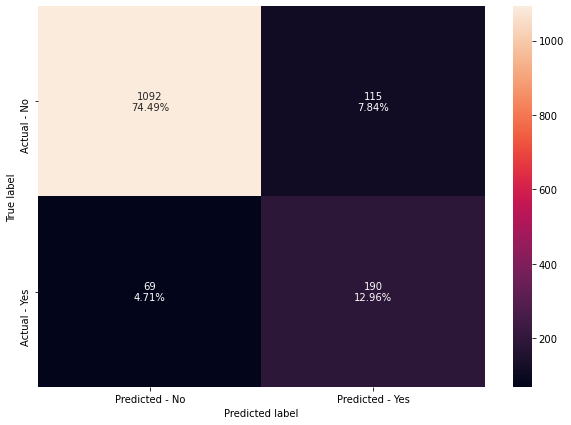

In [139]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

Observation: 
* Model is overfitting in the training - since all values are 1.0 

Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.902455661664393
Recall on training set :  1.0
Recall on test set :  0.5791505791505791
Precision on training set :  1.0
Precision on test set :  0.8152173913043478


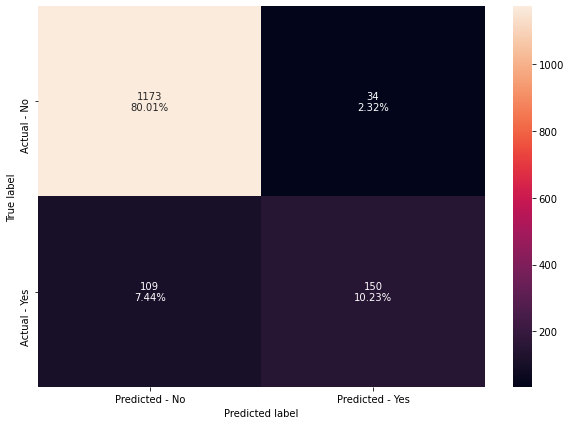

In [140]:
# build the model using the Random Forest Method from sklearn
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# get the metric values
get_metrics_score(rf_model)

# confustion matrix
make_confusion_matrix(rf_model,y_test)

Observation on initial Random Forest:
* Initial model is overfitting
* Recall also dropped from the Decision Tree Model 
* Will require tuning

Bagging

Accuracy on training set :  0.9941503363556595
Accuracy on test set :  0.9045020463847203
Recall on training set :  0.972768532526475
Recall on test set :  0.6486486486486487
Precision on training set :  0.9968992248062015
Precision on test set :  0.7741935483870968


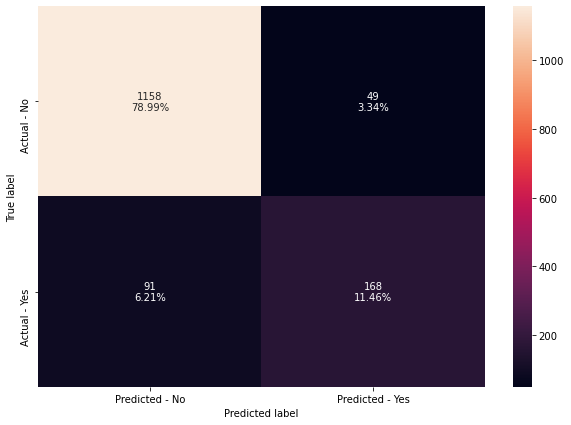

In [141]:
bagging_model = BaggingClassifier(random_state=1)
bagging_model.fit(X_train, y_train)

# metric getter
get_metrics_score(bagging_model)

# confusion matrix
make_confusion_matrix(bagging_model,y_test)

Observations:
* A bit better on the recall than randomforest
* still overfitting

Tuning Decision Tree

In [142]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Accuracy on training set :  0.7288680900848201
Accuracy on test set :  0.7107776261937244
Recall on training set :  0.5370650529500757
Recall on test set :  0.5366795366795367
Precision on training set :  0.3637295081967213
Precision on test set :  0.31376975169300225


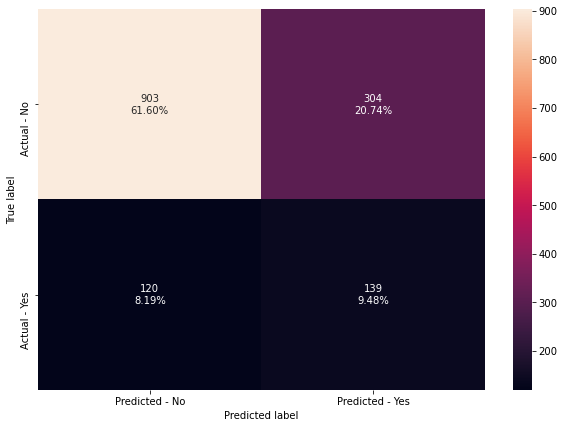

In [143]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

Observations on Tuned Decision Tree:
* Less overfitting this time
* However poor Recall

Tuning Random Forest

In [144]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=9,
                       max_features=0.7, max_samples=0.9999999999999999,
                       min_impurity_decrease=0.0001, n_estimators=110,
                       random_state=1)

Accuracy on training set :  0.9666569172272594
Accuracy on test set :  0.8983628922237381
Recall on training set :  0.8502269288956127
Recall on test set :  0.6177606177606177
Precision on training set :  0.9740034662045061
Precision on test set :  0.7619047619047619


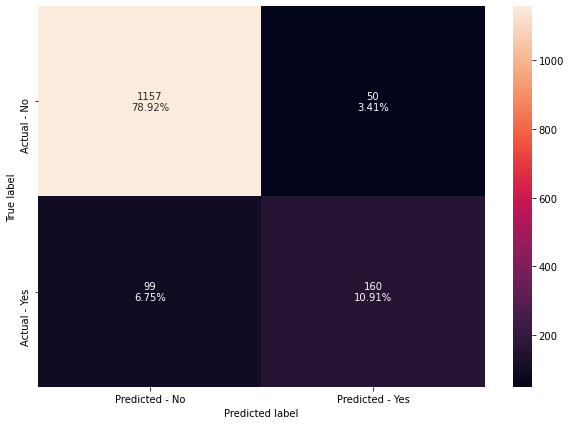

In [145]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

Observations:
* ~ 45 min of CPU processing time 
* small increase in Recall: from 52.7 on RFC to 55% on GridSearchCV RFC_tuned

Tuning Bagging Classifier

In [146]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  0.999707516817783
Accuracy on test set :  0.9195088676671214
Recall on training set :  0.9984871406959153
Recall on test set :  0.694980694980695
Precision on training set :  1.0
Precision on test set :  0.821917808219178


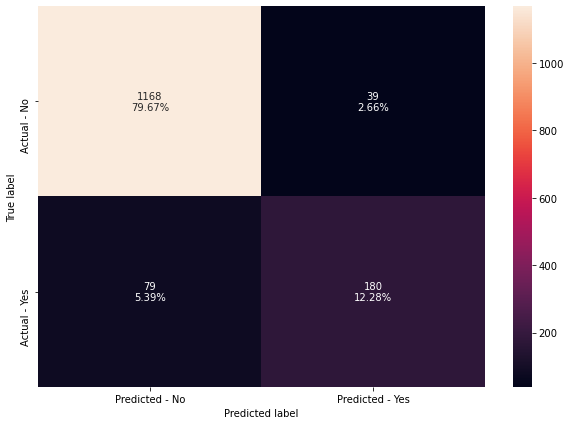

In [147]:
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

Observations:
* Still overfitting
* better test recall - 63.8%

In [148]:
# defining list of models
models = [d_tree, dtree_estimator,rf_model, rf_tuned, bagging_model,bagging_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [149]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.874488,1.000000,0.733591,1.000000,0.622951
5,Bagging Classifier Tuned,0.999708,0.919509,0.998487,0.694981,1.000000,0.821918
4,Bagging Classifier,0.994150,0.904502,0.972769,0.648649,0.996899,0.774194
3,Tuned Random Forest,0.966657,0.898363,0.850227,0.617761,0.974003,0.761905
2,Random Forest,1.000000,0.902456,1.000000,0.579151,1.000000,0.815217
1,Tuned Decision Tree,0.728868,0.710778,0.537065,0.536680,0.363730,0.313770


BOOSTING Models

AdaBoost Regressor

Accuracy on training set :  0.8382568002339865
Accuracy on test set :  0.8424283765347885
Recall on training set :  0.3358547655068079
Recall on test set :  0.3281853281853282
Precision on training set :  0.6607142857142857
Precision on test set :  0.5985915492957746


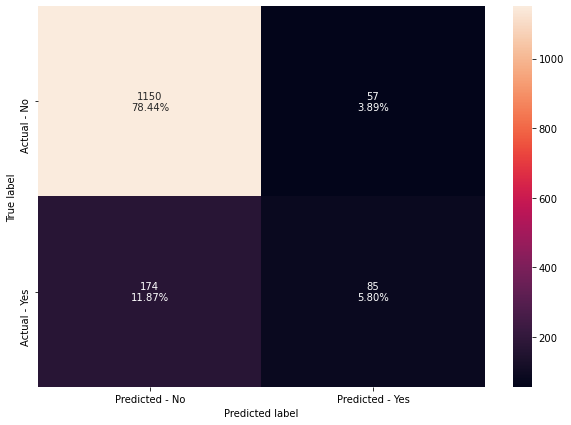

In [150]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

Recall is way too low

AdaBoost Hyperparameter Training 

In [151]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=100, random_state=1)

Accuracy on training set :  0.9675343667739105
Accuracy on test set :  0.8826739427012278
Recall on training set :  0.875945537065053
Recall on test set :  0.6254826254826255
Precision on training set :  0.9523026315789473
Precision on test set :  0.6835443037974683


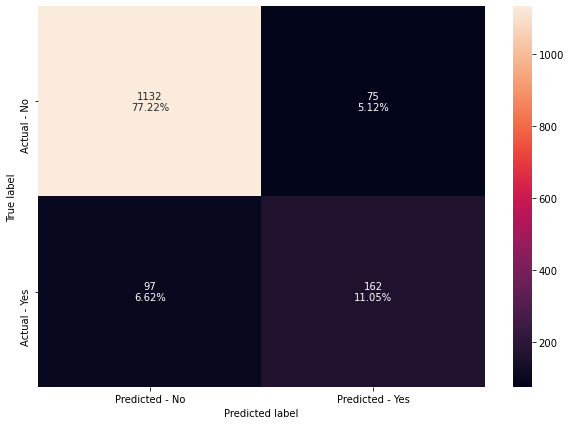

In [152]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

Observations:
* Still overfitting

Gradient Boosting Classifier

Accuracy on training set :  0.8765720971044165
Accuracy on test set :  0.869031377899045
Recall on training set :  0.44175491679273826
Recall on test set :  0.41312741312741313
Precision on training set :  0.8463768115942029
Precision on test set :  0.7278911564625851


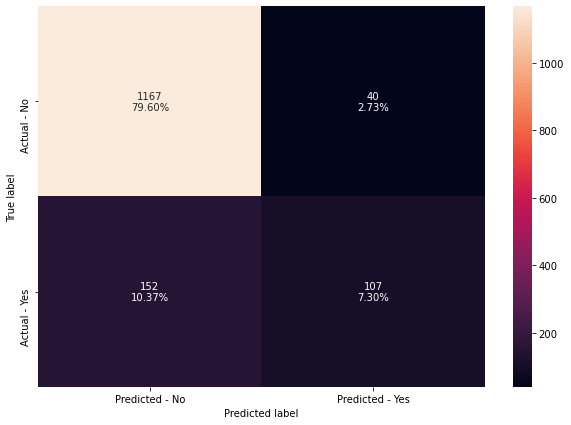

In [153]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

Gradient Boosting Hyperparameter Tuning

In [154]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

Accuracy on training set :  0.9128400116993273
Accuracy on test set :  0.8854024556616644
Recall on training set :  0.6187594553706506
Recall on test set :  0.5019305019305019
Precision on training set :  0.8989010989010989
Precision on test set :  0.7692307692307693


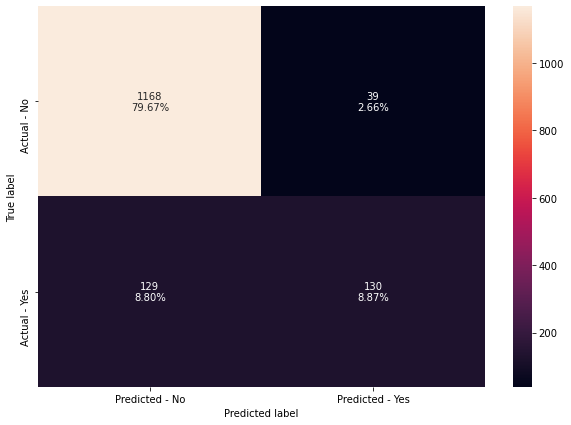

In [155]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

Observations:
* Poor Recall on Test


XGBoost Classifier

Accuracy on training set :  0.9985375840889149
Accuracy on test set :  0.9208731241473397
Recall on training set :  0.9924357034795764
Recall on test set :  0.7335907335907336
Precision on training set :  1.0
Precision on test set :  0.8016877637130801


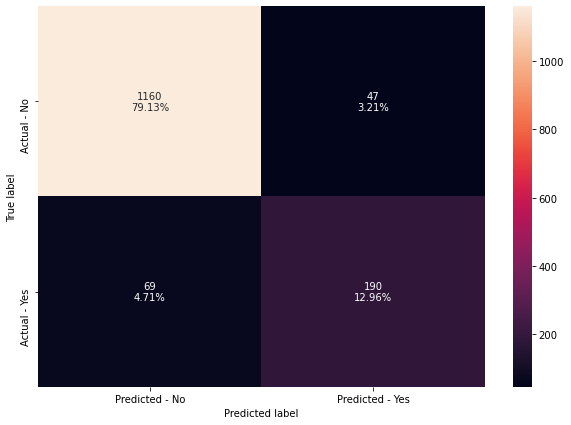

In [156]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

Observation:
* Fast processing
* Still overfitting 
* Better Recall on Test - 67%

XGBoost Hyperparameter Tuning

In [157]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.96168470312957
Accuracy on test set :  0.8847203274215553
Recall on training set :  0.9878971255673222
Recall on test set :  0.8262548262548263
Precision on training set :  0.8414948453608248
Precision on test set :  0.6331360946745562


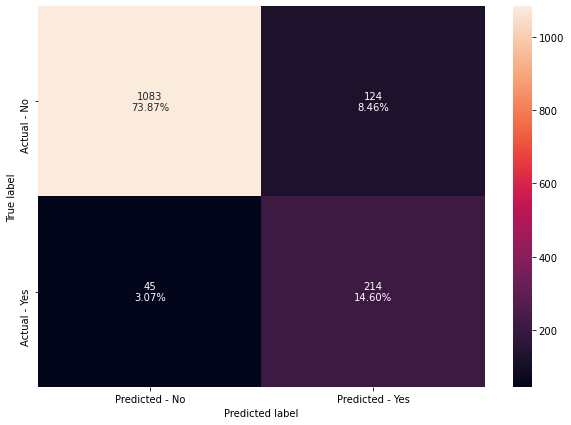

In [158]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

Observations:
* Finally! much better - 76% recall on test 

Stacking Classifier

In [159]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.35,
                                                                     1: 0.65},
                                                       max_depth=9,
                                                       max_features=0.7,
                                                       max_samples=0.9999999999999999,
                                                       min_impurity_decrease=0.0001,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                            

Accuracy on training set :  0.9333138344545189
Accuracy on test set :  0.8431105047748977
Recall on training set :  0.9697428139183056
Recall on test set :  0.8262548262548263
Precision on training set :  0.7550058892815077
Precision on test set :  0.5363408521303258


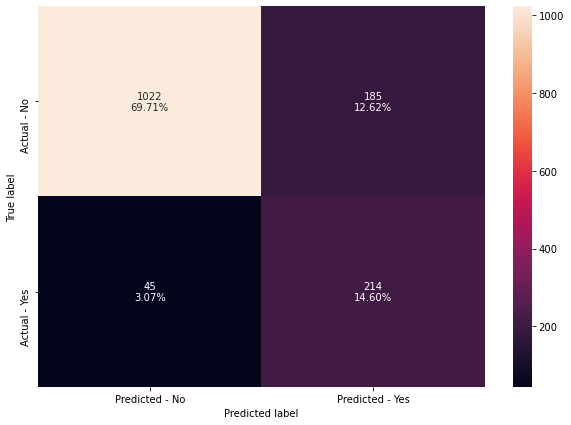

In [160]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

Observations:
* Still a bit of overfitting 
* Improved Recall on test set - 78.7%

Compare all models

In [161]:
# defining list of models
models = [d_tree, dtree_estimator,rf_model, rf_tuned, bagging_model,bagging_estimator_tuned, ab_classifier, 
          abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])


In [162]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
11,Tuned XGBoost Classifier,0.961685,0.884720,0.987897,0.826255,0.841495,0.633136
12,Stacking Classifier,0.933314,0.843111,0.969743,0.826255,0.755006,0.536341
0,Decision Tree,1.000000,0.874488,1.000000,0.733591,1.000000,0.622951
10,XGBoost Classifier,0.998538,0.920873,0.992436,0.733591,1.000000,0.801688
5,Bagging Classifier Tuned,0.999708,0.919509,0.998487,0.694981,1.000000,0.821918
4,Bagging Classifier,0.994150,0.904502,0.972769,0.648649,0.996899,0.774194
7,Tuned AdaBoost Classifier,0.967534,0.882674,0.875946,0.625483,0.952303,0.683544
3,Tuned Random Forest,0.966657,0.898363,0.850227,0.617761,0.974003,0.761905
2,Random Forest,1.000000,0.902456,1.000000,0.579151,1.000000,0.815217
1,Tuned Decision Tree,0.728868,0.710778,0.537065,0.536680,0.363730,0.313770
